In [2]:
#!pip install wget #importando datasets
#import wget
#wget.download('http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data')
#wget.download('http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data')
#wget.download('http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand.names')

In [3]:
import pandas as pd #importando bibliotecas
import numpy as np
import matplotlib.pyplot as fig
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
teste=pd.read_csv("poker-hand-training-true.data",header=None) #lendo datasets e os classificando
treino=pd.read_csv("poker-hand-testing.data",header=None)
coluna=['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)','Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)','Mão']
treino.columns=coluna
teste.columns=coluna

In [5]:
treino.head()

,Naipe carta (1),Valor carta (1),Naipe carta (2),Valor carta (2),Naipe carta (3),Valor carta (3),Naipe carta (4),Valor carta (4),Naipe carta (5),Valor carta (5),Mão
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [6]:
teste.head()

,Naipe carta (1),Valor carta (1),Naipe carta (2),Valor carta (2),Naipe carta (3),Valor carta (3),Naipe carta (4),Valor carta (4),Naipe carta (5),Valor carta (5),Mão
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [7]:
treino['Mão'] = treino['Mão'].astype('category') #transformando a coluna mao em variavel categorica

In [8]:
treino['Mão'].cat.categories = ['Carta Alta','Um Par','Dois Pares','Trinca','Sequência','Flush','Full House','Quadra','Straight Flush','Royal Straight Flush'] #transformando os numeros em nomes das maos

In [9]:
treino.head()

,Naipe carta (1),Valor carta (1),Naipe carta (2),Valor carta (2),Naipe carta (3),Valor carta (3),Naipe carta (4),Valor carta (4),Naipe carta (5),Valor carta (5),Mão
0,1,1,1,13,2,4,2,3,1,12,Carta Alta
1,3,12,3,2,3,11,4,5,2,5,Um Par
2,1,9,4,6,1,4,3,2,3,9,Um Par
3,1,4,3,13,2,13,2,1,3,6,Um Par
4,3,10,2,7,1,2,2,11,4,9,Carta Alta


In [10]:
teste['Mão'] = teste['Mão'].astype('category')

In [11]:
teste['Mão'].cat.categories = ['Carta Alta','Um Par','Dois Pares','Trinca','Sequência','Flush','Full House','Quadra','Straight Flush','Royal Straight Flush']

In [12]:
teste.head()

,Naipe carta (1),Valor carta (1),Naipe carta (2),Valor carta (2),Naipe carta (3),Valor carta (3),Naipe carta (4),Valor carta (4),Naipe carta (5),Valor carta (5),Mão
0,1,10,1,11,1,13,1,12,1,1,Royal Straight Flush
1,2,11,2,13,2,10,2,12,2,1,Royal Straight Flush
2,3,12,3,11,3,13,3,10,3,1,Royal Straight Flush
3,4,10,4,11,4,1,4,13,4,12,Royal Straight Flush
4,4,1,4,13,4,12,4,11,4,10,Royal Straight Flush


In [13]:
t0=treino.loc[treino['Mão']== 'Carta Alta', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)', #criando dataframes separados para cada tipo de mao
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t1=treino.loc[treino['Mão']== 'Um Par', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t2=treino.loc[treino['Mão']== 'Dois Pares', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t3=treino.loc[treino['Mão']== 'Trinca', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t4=treino.loc[treino['Mão']== 'Sequência', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t5=treino.loc[treino['Mão']== 'Flush', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t6=treino.loc[treino['Mão']== 'Full House', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t7=treino.loc[treino['Mão']== 'Quadra', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t8=treino.loc[treino['Mão']== 'Straight Flush', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

t9=treino.loc[treino['Mão']== 'Royal Straight Flush', ['Naipe carta (1)','Valor carta (1)','Naipe carta (2)','Valor carta (2)','Naipe carta (3)',
 'Valor carta (3)','Naipe carta (4)','Valor carta (4)','Naipe carta (5)','Valor carta (5)']]

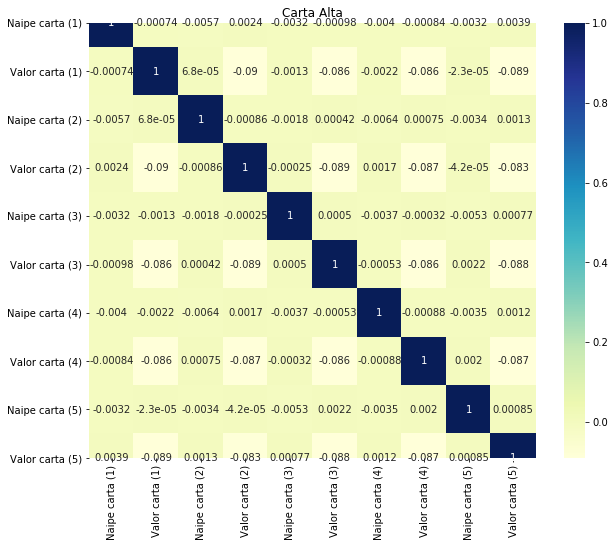

In [14]:
fig.figure(figsize = (10, 8)) #estudando a correlacao entre as maos com heatmaps
sns.heatmap(t0.corr(), annot = True, cmap="YlGnBu")
fig.title('Carta Alta')
fig.show()

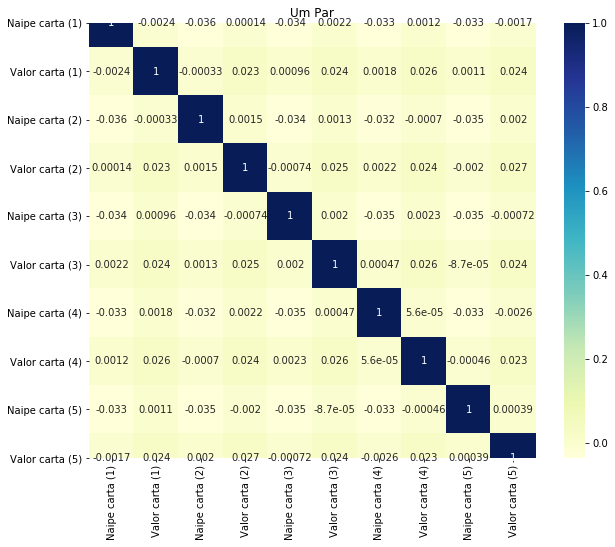

In [15]:
fig.figure(figsize = (10, 8))
sns.heatmap(t1.corr(), annot = True, cmap="YlGnBu")
fig.title('Um Par')
fig.show()

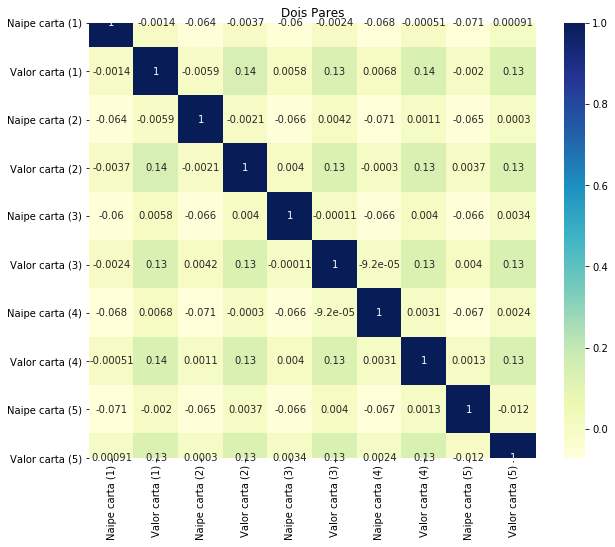

In [16]:
fig.figure(figsize = (10, 8))
sns.heatmap(t2.corr(), annot = True, cmap="YlGnBu")
fig.title('Dois Pares')
fig.show()

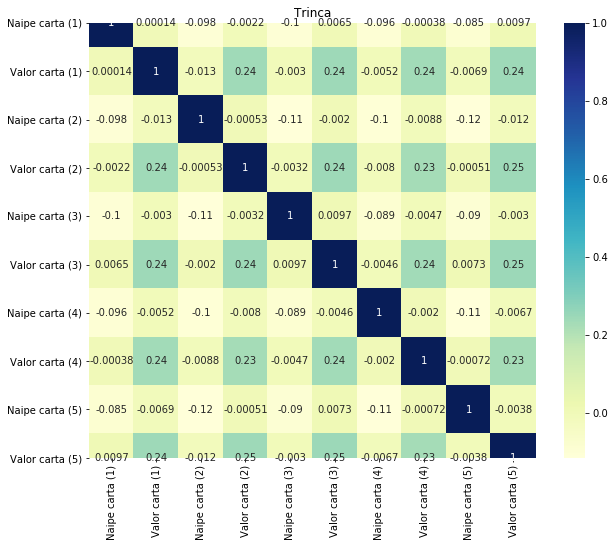

In [17]:
fig.figure(figsize = (10, 8))
sns.heatmap(t3.corr(), annot = True, cmap="YlGnBu")
fig.title('Trinca')
fig.show()

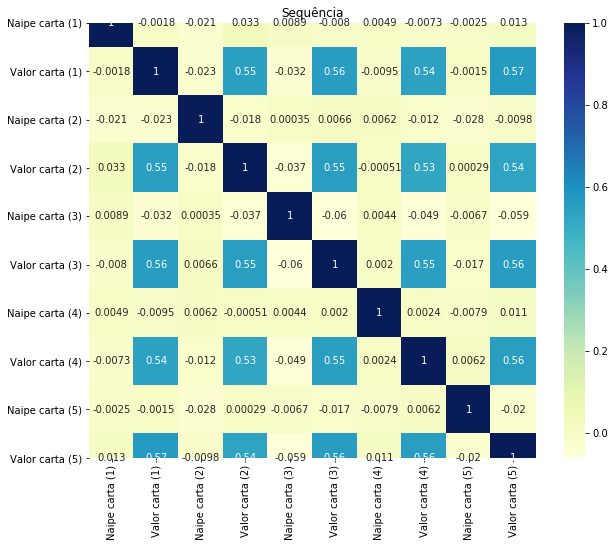

In [18]:
fig.figure(figsize = (10, 8))
sns.heatmap(t4.corr(), annot = True, cmap="YlGnBu")
fig.title('Sequência')
fig.show()

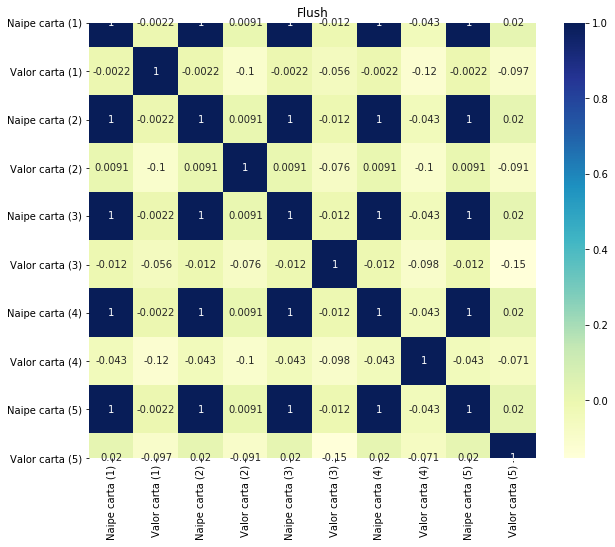

In [19]:
fig.figure(figsize = (10, 8))
sns.heatmap(t5.corr(), annot = True, cmap="YlGnBu")
fig.title('Flush')
fig.show()

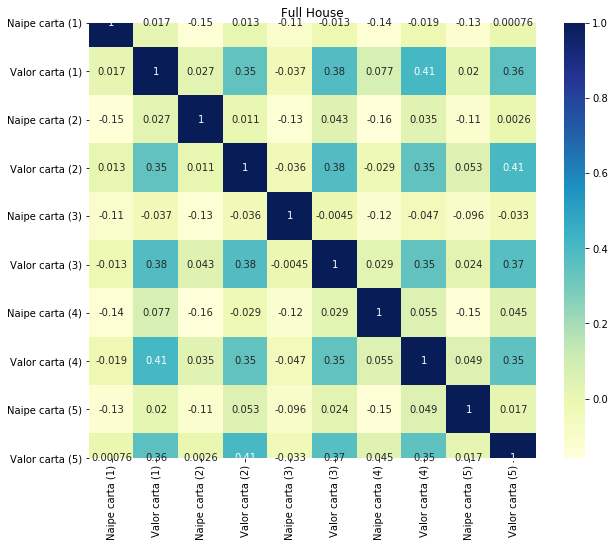

In [20]:
fig.figure(figsize = (10, 8))
sns.heatmap(t6.corr(), annot = True, cmap="YlGnBu")
fig.title('Full House')
fig.show()

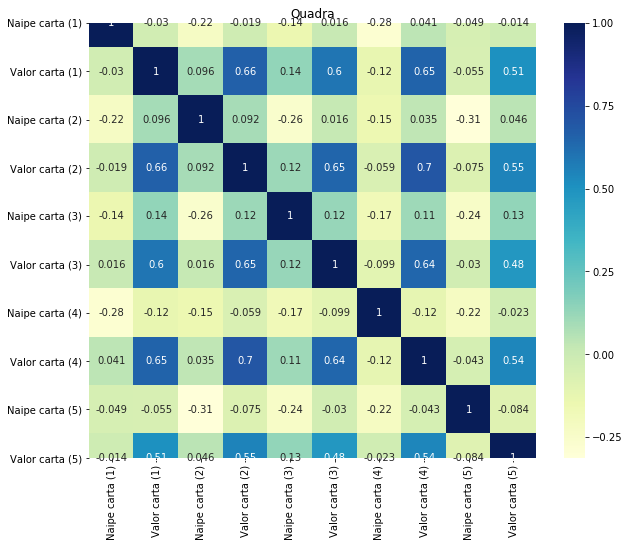

In [21]:
fig.figure(figsize = (10, 8))
sns.heatmap(t7.corr(), annot = True, cmap="YlGnBu")
fig.title('Quadra')
fig.show()

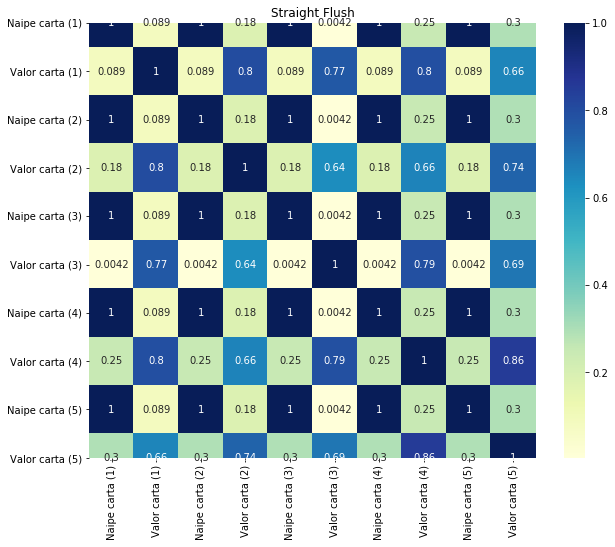

In [22]:
fig.figure(figsize = (10, 8)) #esta mao tem a maior correlacao
sns.heatmap(t8.corr(), annot = True, cmap="YlGnBu")
fig.title('Straight Flush')
fig.show()

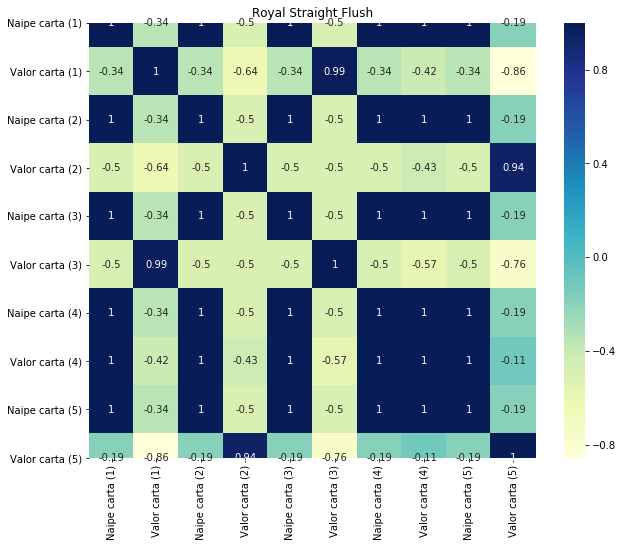

In [23]:
fig.figure(figsize = (10, 8))
sns.heatmap(t9.corr(), annot = True, cmap="YlGnBu")
fig.title('Royal Straight Flush')
fig.show()

In [24]:
t8.describe() #algumas caracteristicas sobre nossa mao

,Naipe carta (1),Valor carta (1),Naipe carta (2),Valor carta (2),Naipe carta (3),Valor carta (3),Naipe carta (4),Valor carta (4),Naipe carta (5),Valor carta (5)
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2.416667,8.583333,2.416667,7.583333,2.416667,8.166667,2.416667,7.083333,2.416667,7.333333
std,1.164500,2.712206,1.164500,2.998737,1.164500,3.128559,1.164500,2.968267,1.164500,2.994945
min,1.000000,4.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000
25%,1.750000,7.000000,1.750000,5.750000,1.750000,5.750000,1.750000,5.000000,1.750000,5.500000
50%,2.000000,8.000000,2.000000,7.000000,2.000000,9.000000,2.000000,6.500000,2.000000,8.000000
75%,3.250000,10.250000,3.250000,11.000000,3.250000,9.500000,3.250000,10.000000,3.250000,9.000000
max,4.000000,13.000000,4.000000,12.000000,4.000000,13.000000,4.000000,11.000000,4.000000,13.000000


In [25]:
treino_y=treino['Mão'] #aplicando a regression tree
teste_y=teste['Mão']
treino_y=pd.get_dummies(treino_y)
teste_y=pd.get_dummies(teste_y)

treino_x=treino.drop('Mão',axis=1)
teste_x=teste.drop('Mão',axis=1)

In [26]:
decision_tree=DecisionTreeClassifier(random_state=0,max_depth = 2)
decision_tree=decision_tree.fit(treino_x,treino_y)
previsao_y=decision_tree.predict(teste_x)
accuracy_score(previsao_y,teste_y)

0.2290283886445422

In [27]:
colunas_ordem = treino.columns.tolist()
lista = [0,2,4,6,8,1,3,5,7,9,10]
colunas_ordem = [colunas_ordem[i] for i in lista]

In [28]:
treino_ordem = treino[colunas_ordem]
treino_ordem.head()

,Naipe carta (1),Naipe carta (2),Naipe carta (3),Naipe carta (4),Naipe carta (5),Valor carta (1),Valor carta (2),Valor carta (3),Valor carta (4),Valor carta (5),Mão
0,1,1,2,2,1,1,13,4,3,12,Carta Alta
1,3,3,3,4,2,12,2,11,5,5,Um Par
2,1,4,1,3,3,9,6,4,2,9,Um Par
3,1,3,2,2,3,4,13,13,1,6,Um Par
4,3,2,1,2,4,10,7,2,11,9,Carta Alta


In [29]:
teste_ordem = teste[colunas_ordem]
teste_ordem.head()

,Naipe carta (1),Naipe carta (2),Naipe carta (3),Naipe carta (4),Naipe carta (5),Valor carta (1),Valor carta (2),Valor carta (3),Valor carta (4),Valor carta (5),Mão
0,1,1,1,1,1,10,11,13,12,1,Royal Straight Flush
1,2,2,2,2,2,11,13,10,12,1,Royal Straight Flush
2,3,3,3,3,3,12,11,13,10,1,Royal Straight Flush
3,4,4,4,4,4,10,11,1,13,12,Royal Straight Flush
4,4,4,4,4,4,1,13,12,11,10,Royal Straight Flush


In [30]:
treino_t8 = treino_ordem.loc[treino_ordem['Mão'] == 'Straight Flush']
treino_t8.head()

,Naipe carta (1),Naipe carta (2),Naipe carta (3),Naipe carta (4),Naipe carta (5),Valor carta (1),Valor carta (2),Valor carta (3),Valor carta (4),Valor carta (5),Mão
27553,4,4,4,4,4,5,4,8,6,7,Straight Flush
128993,2,2,2,2,2,10,11,9,7,8,Straight Flush
197593,3,3,3,3,3,4,5,3,1,2,Straight Flush
280632,2,2,2,2,2,7,6,4,5,8,Straight Flush
388599,2,2,2,2,2,8,7,5,6,4,Straight Flush


In [31]:
teste_t8 = teste_ordem.loc[teste_ordem['Mão'] == 'Straight Flush']
teste_t8.head()

,Naipe carta (1),Naipe carta (2),Naipe carta (3),Naipe carta (4),Naipe carta (5),Valor carta (1),Valor carta (2),Valor carta (3),Valor carta (4),Valor carta (5),Mão
5,1,1,1,1,1,2,4,5,3,6,Straight Flush
6,1,1,1,1,1,9,12,10,11,13,Straight Flush
7,2,2,2,2,2,1,2,3,4,5,Straight Flush
8,3,3,3,3,3,5,6,9,7,8,Straight Flush
9,4,4,4,4,4,1,4,2,3,5,Straight Flush


In [32]:
treino_t8_y=treino_t8['Mão'] #aplicando a regression tree
teste_t8_y=teste_t8['Mão']
treino_t8_y=pd.get_dummies(treino_t8_y)
teste_t8_y=pd.get_dummies(teste_t8_y)

treino_t8_x=treino_t8.drop('Mão',axis=1)
teste_t8_x=teste_t8.drop('Mão',axis=1)

In [33]:
decision_tree=DecisionTreeClassifier(random_state=0,max_depth = 2)
decision_tree=decision_tree.fit(treino_t8_x,treino_t8_y)
previsao_t8_y=decision_tree.predict(teste_t8_x)
accuracy_score(previsao_t8_y,teste_t8_y)

1.0